# Multi-Agent System (Automatic Operation Stage)

****Multi-agent System****: Responsible for automatically managing the inference workflow or service

****Agents****: Reactive agent, each agent contains sensors,rules and actuators

Scanflow internally support template of four types of agents
- *Monitor*: Monitor the workflow
- *Analyzer*: Analyze the problem
- *Planner*: Make plan to solve problems 
- *Application-layer Executor*: Make actions on application layer

****Scanflow Server****
- *Infrastructure-layer Executor*: Make actions on infrastructure layer

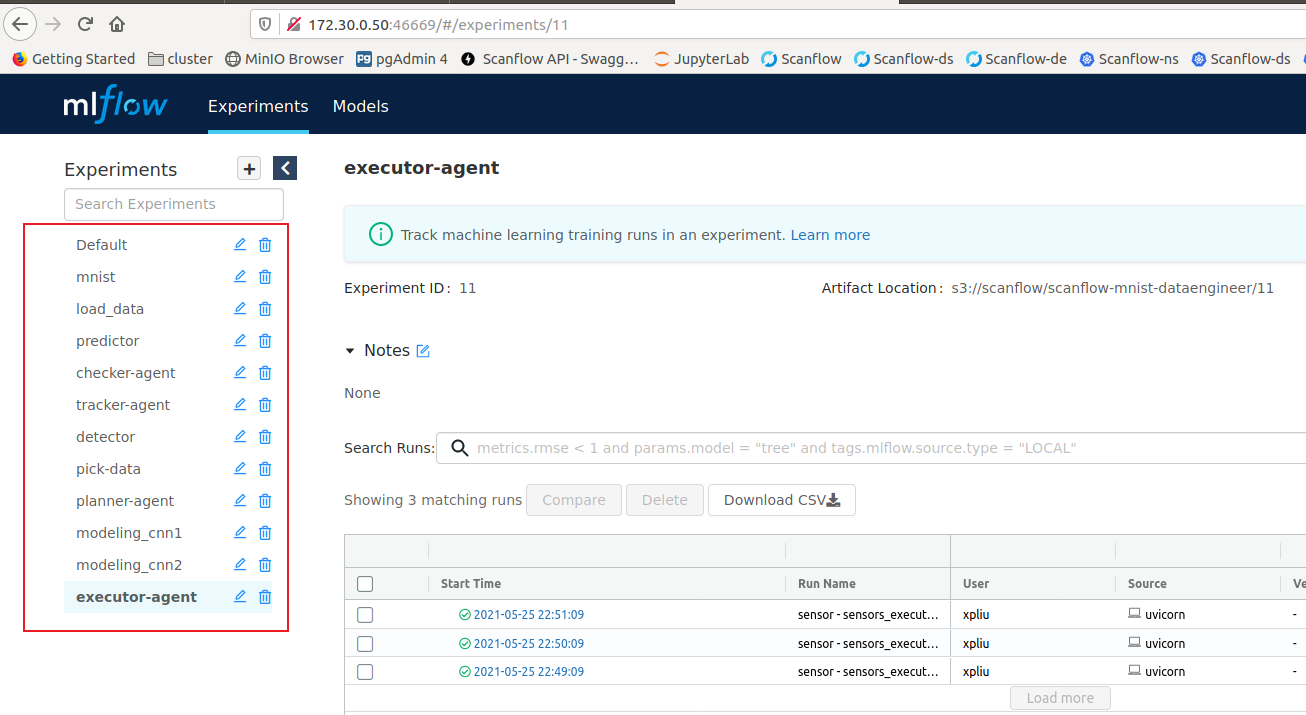

In [29]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/agents.png", width=1000, height=400)

## Use Case

- Scenario 1: Update current model to a new model that retained by the checked new data
    - tracker agent
        - sensor: count number of predictions every 1 hour
        - rule: if value > 999
        - actuator: CALL checker agent check the predictions
    - checker agent
        - sensor1: get check the predictions call
        - actuator1: CALL scanflow-server run detector-inference workflow
        - sensor2: count number of newdata every 1 hour
        - rule2: if newdata > 50
        - actuator2: CALL planner agent retain the model
    - planner agent
        - sensor1: get retain the model call
        - actuator1: CALL scanflow-server run mnist-wf workflow
        - sensor2: check the model accurancy
        - rule2: if has better model
        - actuator2: CALL executor agent change model transition
                     CALL scanflow-server update the model inside the model-serving service       
    - executor agent (internal)
        - senseor: get change model transition call
        - actuator: change model transition
    - scanflow-server (internal)
        - sensor: get update model inside the model-serving service call
        - actuator: update model inside the model-serving service
- Scenario 2: Update current model to a new model from central scanflow-tracker
    - monitor agent 
        - sensor: download the new model from the central scanflow-tracker
        - rule: check the new model is better than the current model
        - actuator: CALL executor agent change model transition
                    CALL scanflow-server update the model inside the model-serving service
    - executor agent (internal)
        - senseor: get change model transition call
        - actuator: change model transition
    - scanflow-server (internal)
        - sensor: get update model inside the model-serving service call
        - actuator: update model inside the model-serving service

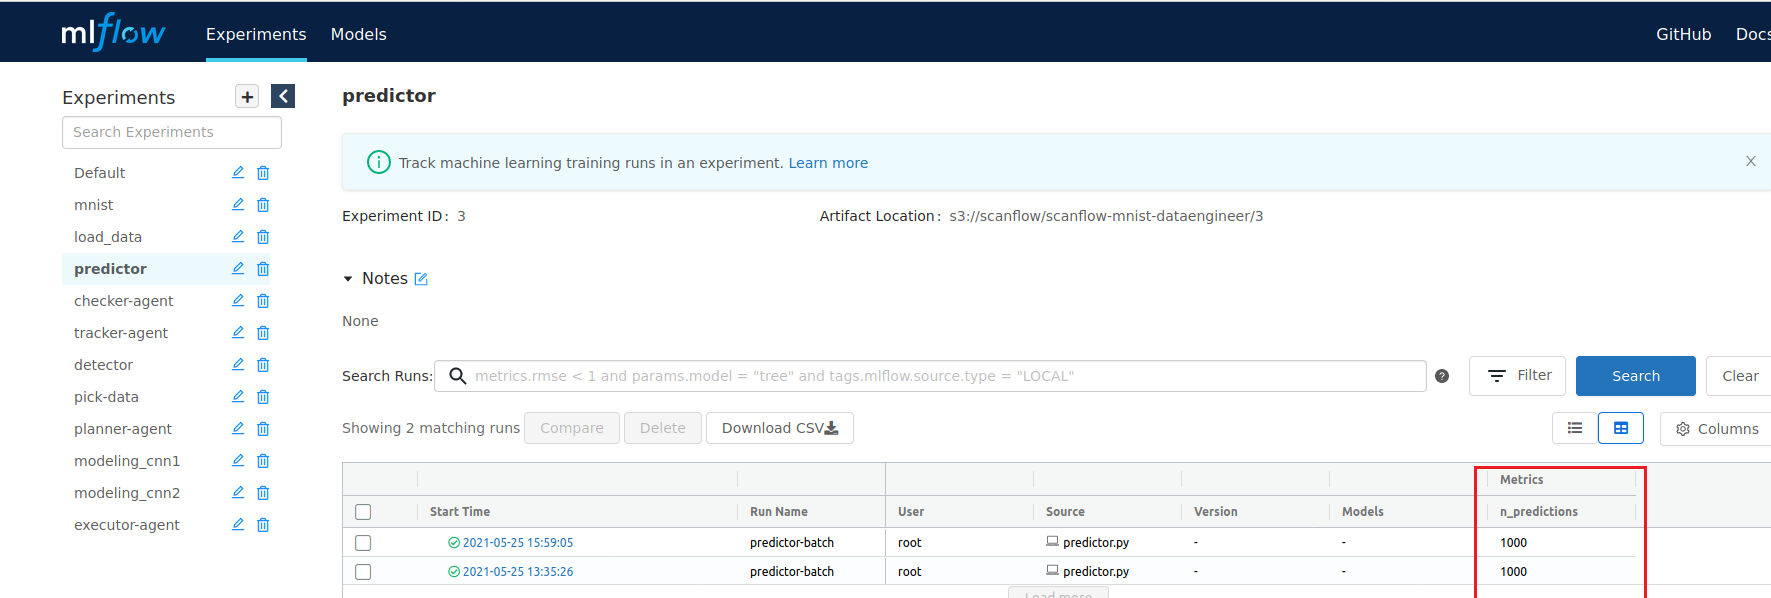

In [5]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/predictor.png", width=1000, height=400)

## Agents
### Tracker(Monitor): 
- Scenario 1: Update current model to a new model that retained by the checked new data
    - tracker agent
        - sensor: count number of predictions every 1 hour
        - rule: if value > 999
        - actuator: CALL checker agent check the predictions

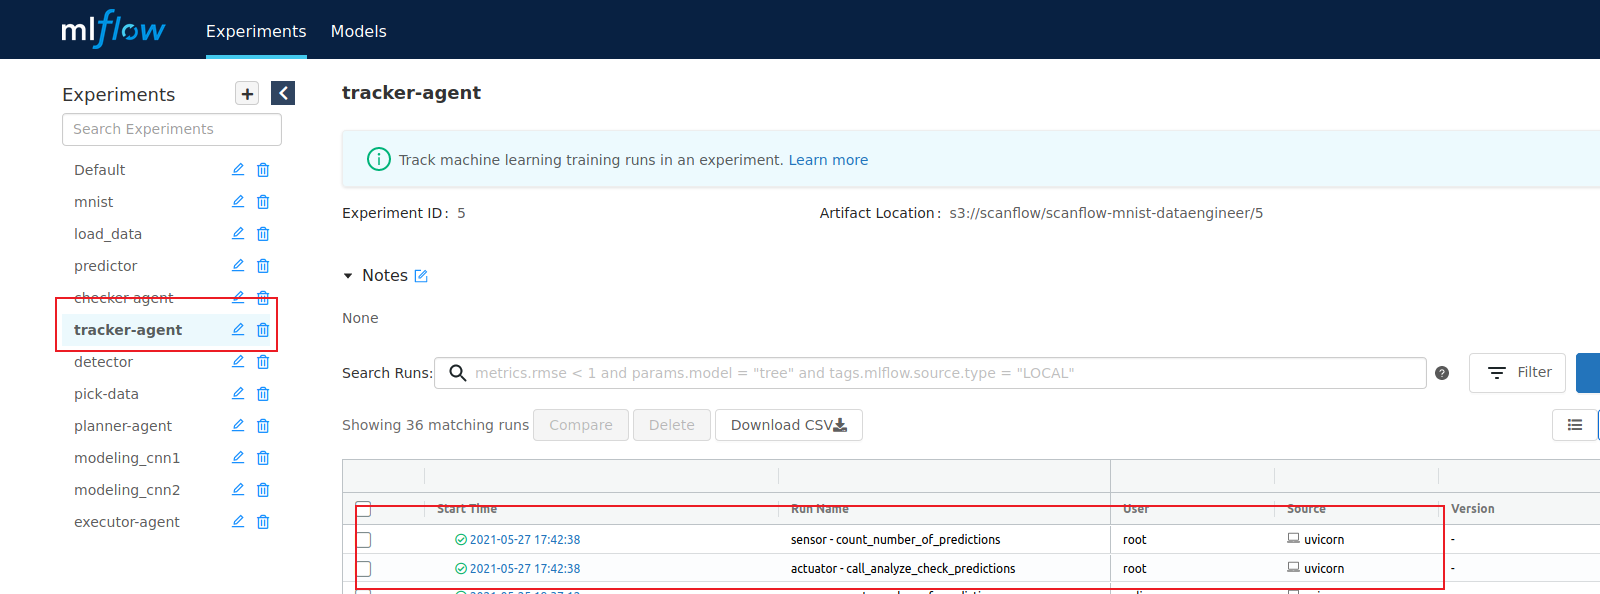

In [3]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/tracker.png", width=1000, height=400)

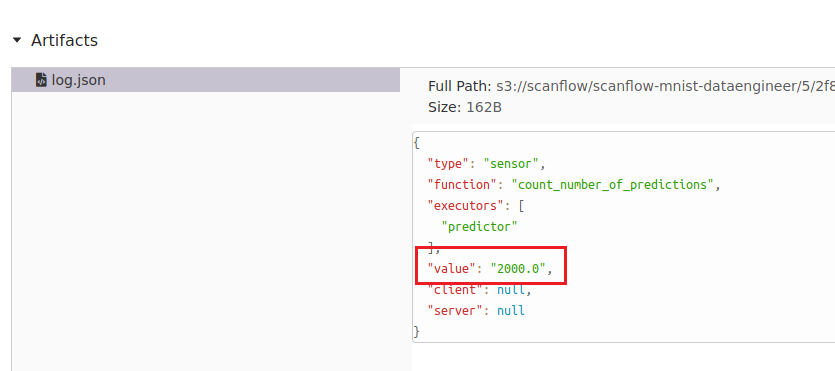

In [23]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/tracker-s-countprediction.png", width=500, height=400)

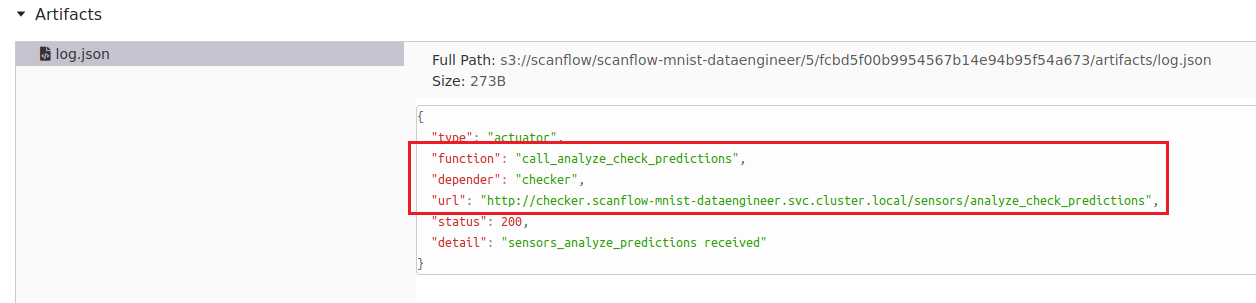

In [6]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/tracker-a-callchecker.png", width=1000, height=400)

### Checker(Analyzer): 
- Scenario 1: Update current model to a new model that retained by the checked new data
    - checker agent
        - sensor1: get check the predictions call
        - actuator1: CALL scanflow-server run detector-inference workflow
        - sensor2: count number of newdata every 1 hour
        - rule2: if newdata > 50
        - actuator2: CALL planner agent retain the model

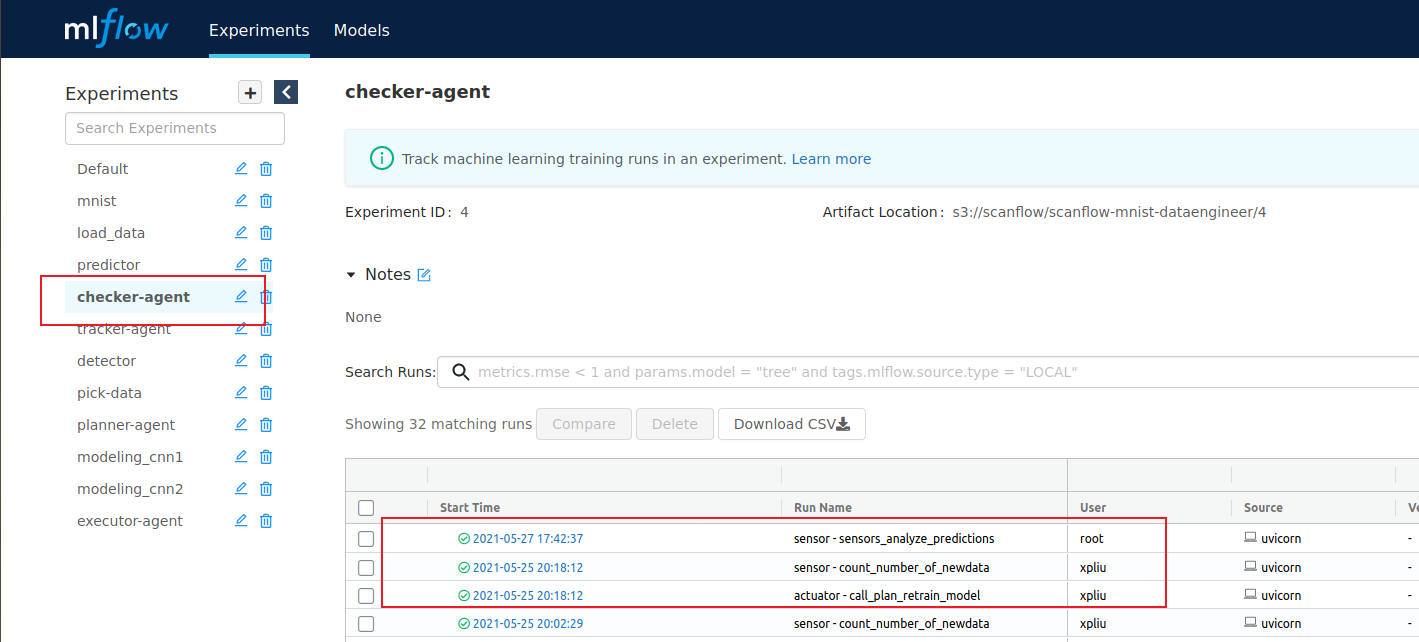

In [25]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/checker.png", width=1000, height=400)

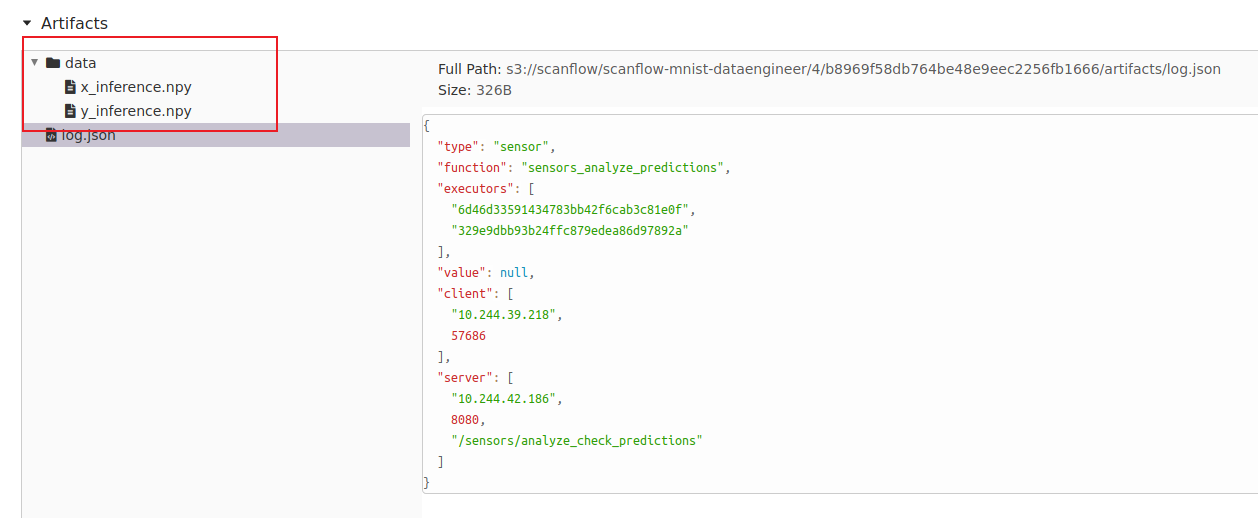

In [8]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/checker-sa-checkerwf.png", width=1000, height=400)

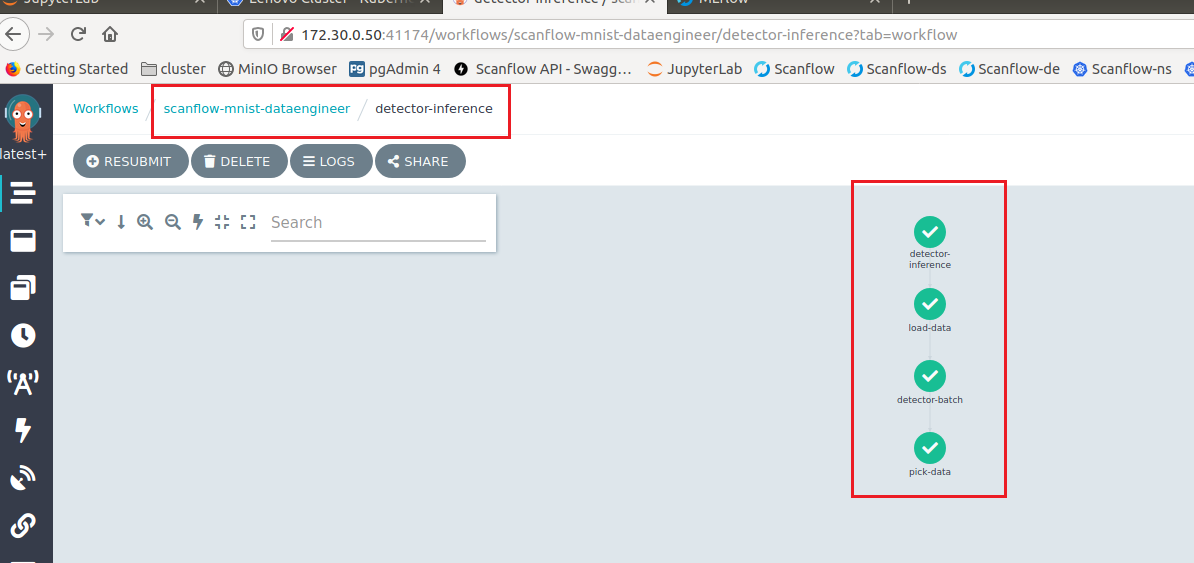

In [10]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/mas-1.png", width=1000, height=400)

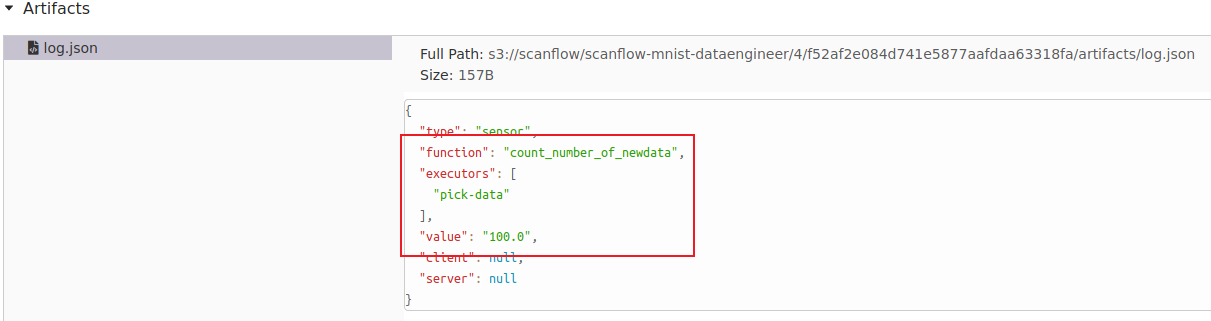

In [11]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/checker-s-countnewdata.png", width=1000, height=400)

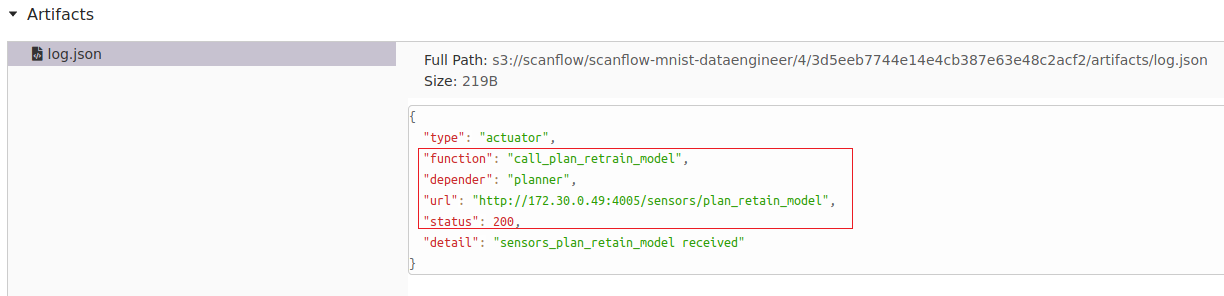

In [12]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/checker-a-callretrain.png", width=1000, height=400)

### Planner: 
- Scenario 1: Update current model to a new model that retained by the checked new data
    - planner agent
        - sensor1: get retain the model call
        - actuator1: CALL scanflow-server run mnist-wf workflow
        - sensor2: check the model accurancy
        - rule2: if has better model
        - actuator2: CALL executor agent change model transition
                     CALL scanflow-server update the model inside the model-serving service     

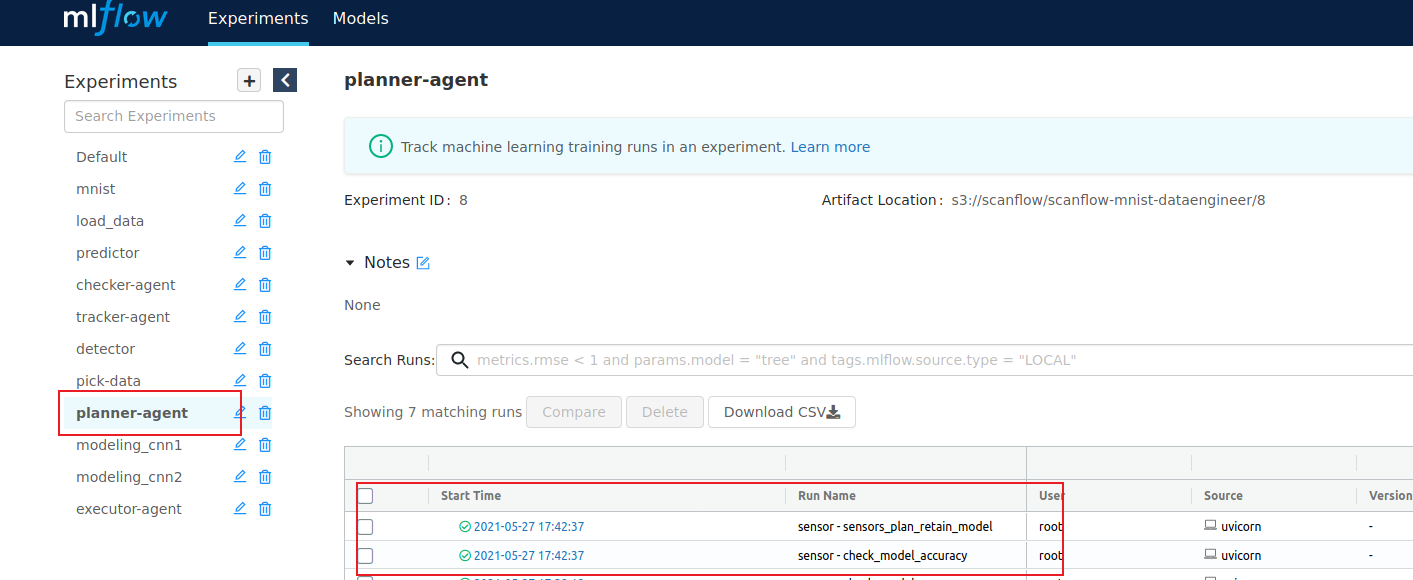

In [13]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/planner.png", width=1000, height=400)

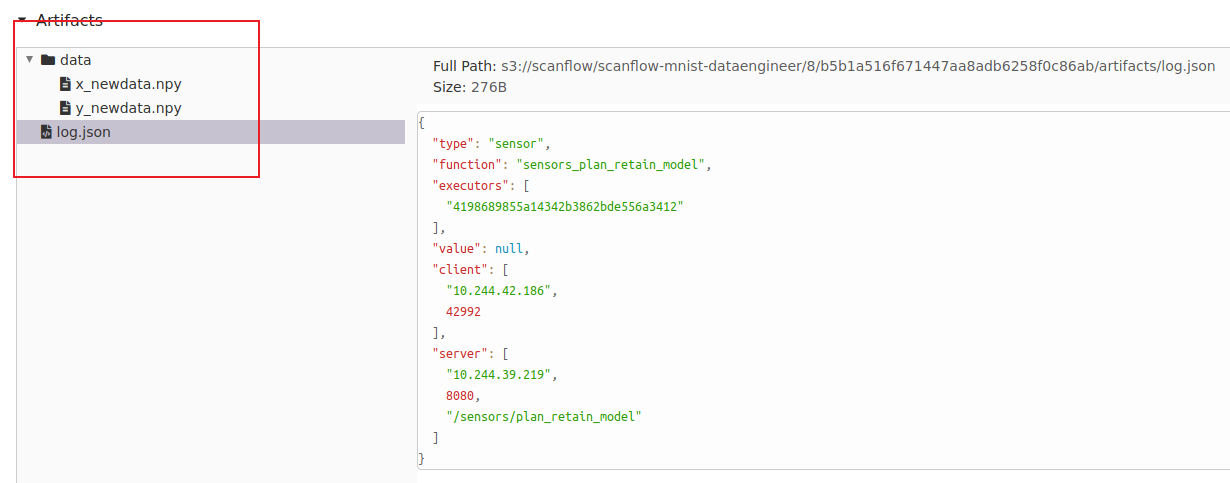

In [14]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/planner-sa-calltrainingwf.png", width=1000, height=400)

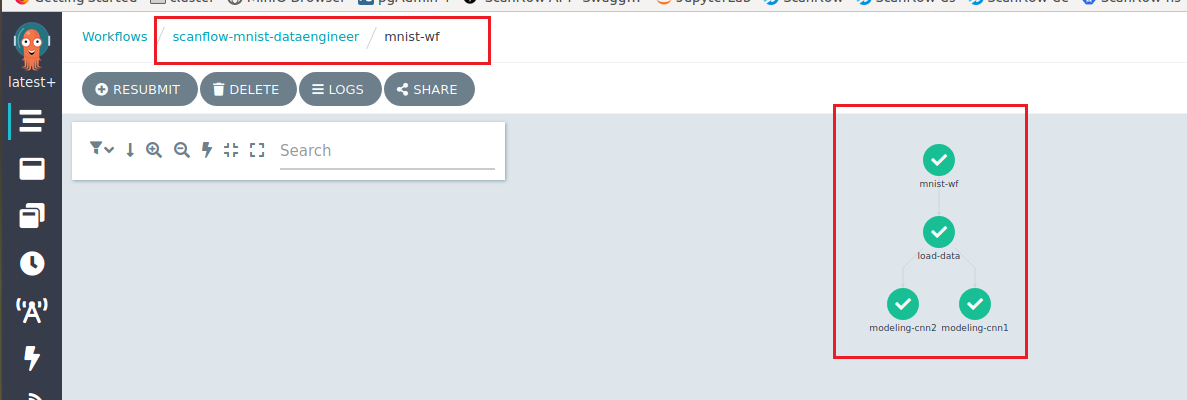

In [15]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/mas-2.png", width=1000, height=400)

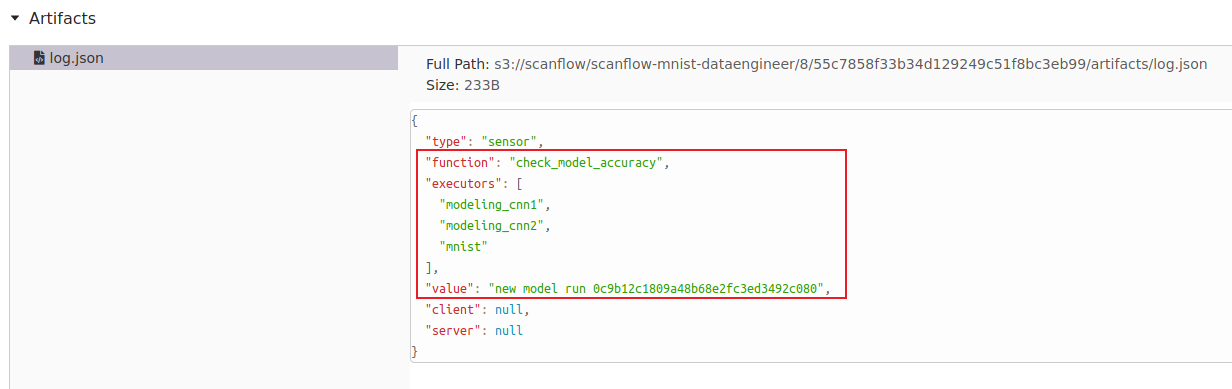

In [18]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/planner-s-modelaccuracy.png", width=1000, height=400)

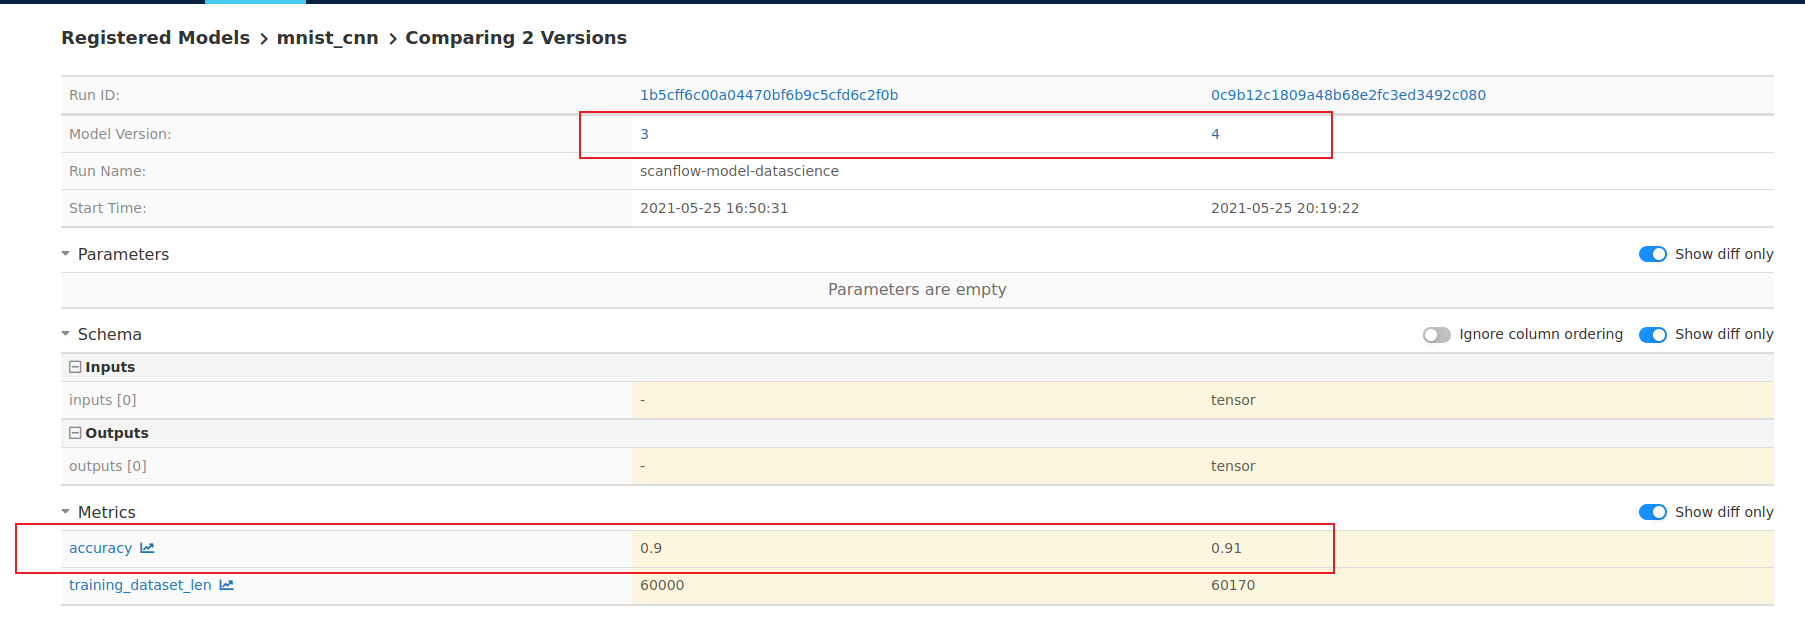

In [19]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/planner-model.png", width=1000, height=400)

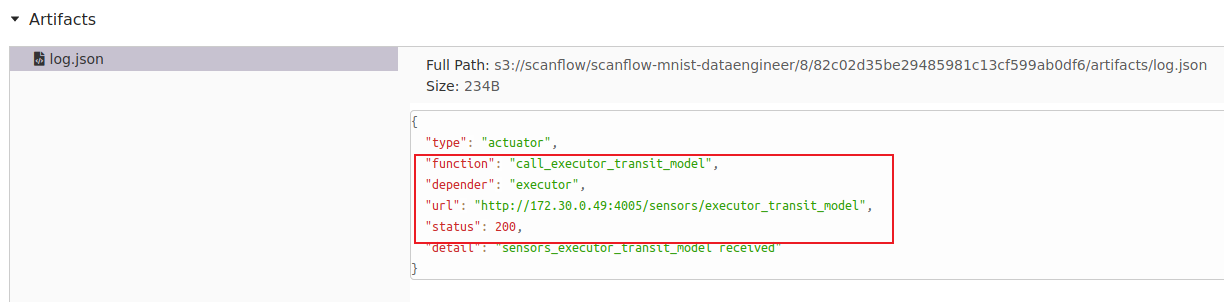

In [16]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/planner-calltransit.png", width=1000, height=400)

### Executor: 
- Scenario 1: Update current model to a new model that retained by the checked new data
    - executor agent (internal)
        - senseor: get change model transition call
        - actuator: change model transition

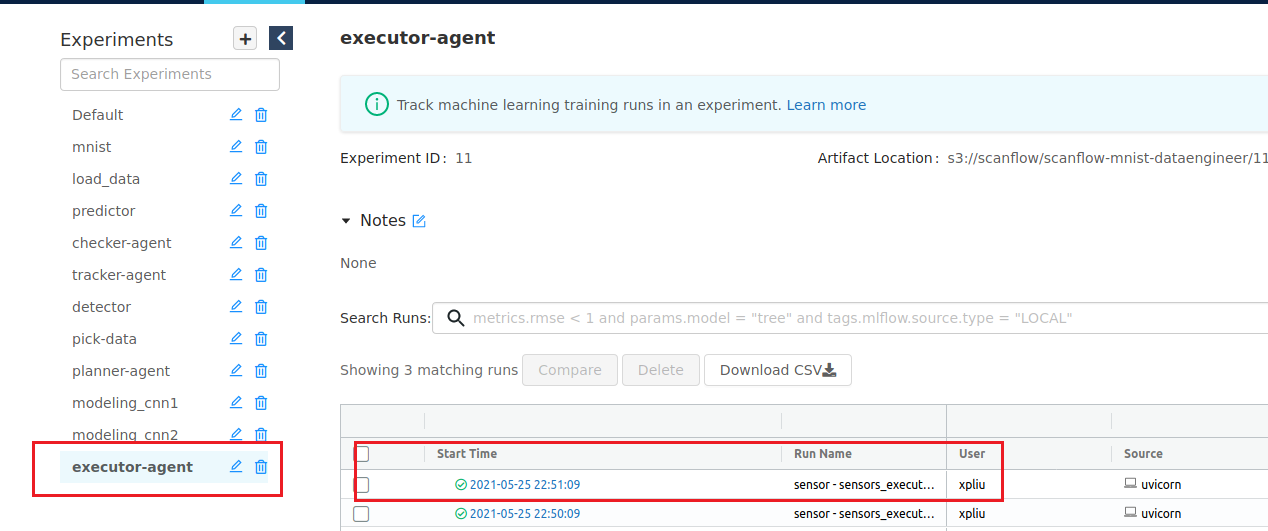

In [17]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/executor.png", width=1000, height=400)

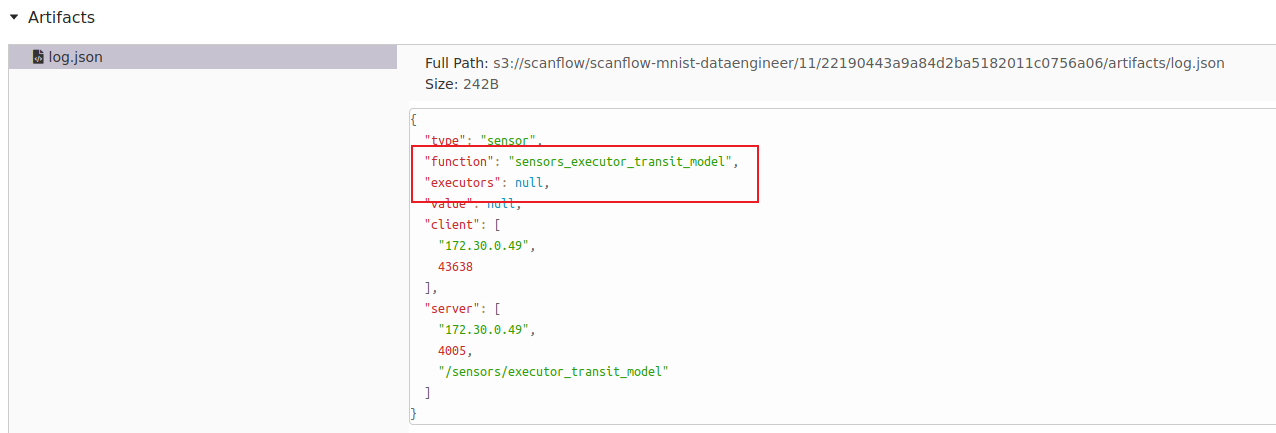

In [20]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/executor-sa-calltransit.png", width=1000, height=400)

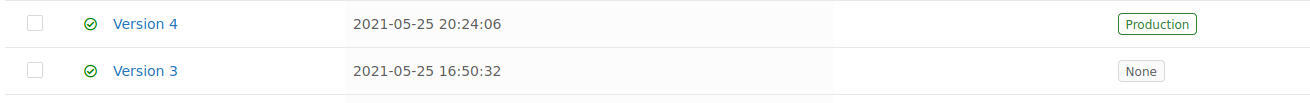

In [22]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/agents/model stage.png", width=1000, height=400)

## Scanflow Server

- Scenario 1: Update current model to a new model that retained by the checked new data
    - scanflow-server (internal)
        - sensor: get update model inside the model-serving service call
        - actuator: update model inside the model-serving service

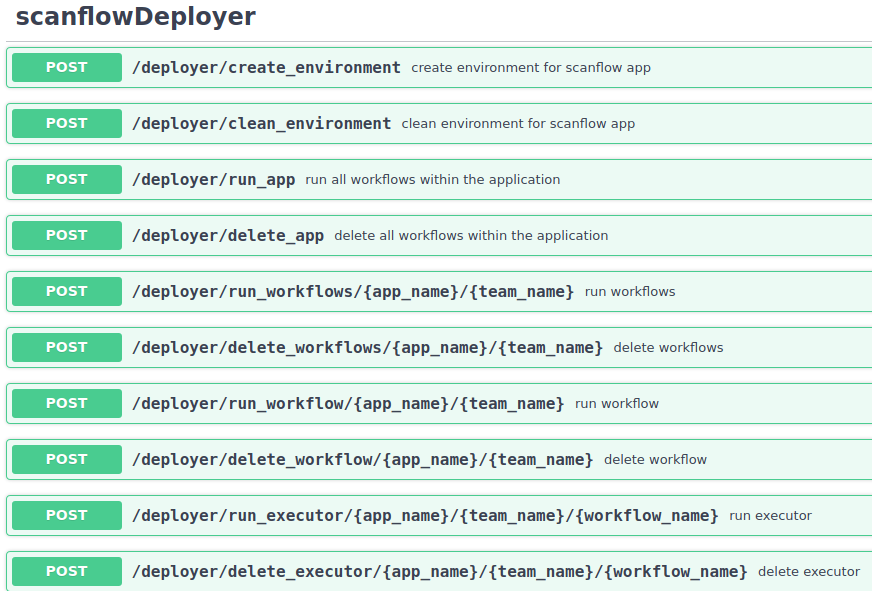

In [28]:
from IPython.display import Image
Image("/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/images/scanflow-server.png", width=600, height=400)